<a href="https://colab.research.google.com/github/paraxioms/Notebook_Store/blob/main/IndiaAirPollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preliminaries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

In [ ]:
cityDay = 'city_day.csv'
df = pd.read_csv(cityDay, parse_dates=['Date'])
df.tail(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [ ]:
total = df.isnull().sum().sort_values(ascending=False)
percent = 100*((df.isnull().sum()/ df.isnull().count())).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data
missing_data.style.background_gradient(cmap='Reds')

,Total,Percent
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI_Bucket,4681,15.851139
AQI,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


In [ ]:
cityList = df['City'].value_counts().index
cityList

Index(['Delhi', 'Lucknow', 'Chennai', 'Bengaluru', 'Mumbai', 'Ahmedabad',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl'],
      dtype='object')

In [ ]:
print(len(cityList))

26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
 print("Start Date:", df['Date'].min())
 print("End Date:", df['Date'].max())

Start Date: 2015-01-01 00:00:00
End Date: 2020-07-01 00:00:00


In [ ]:
fullpollutantList = ["PM2.5",	"PM10",	"NO",	"NO2", "NOx",	"NH3",	"CO",	"SO2",	"O3",	"Benzene",	"Toluene",	"Xylene"]

## Data Visualisation

### Combined Data

In [ ]:
pollutantList = ['PM2.5','PM10','NO2', 'SO2']

In [ ]:
df.set_index('Date',inplace=True)

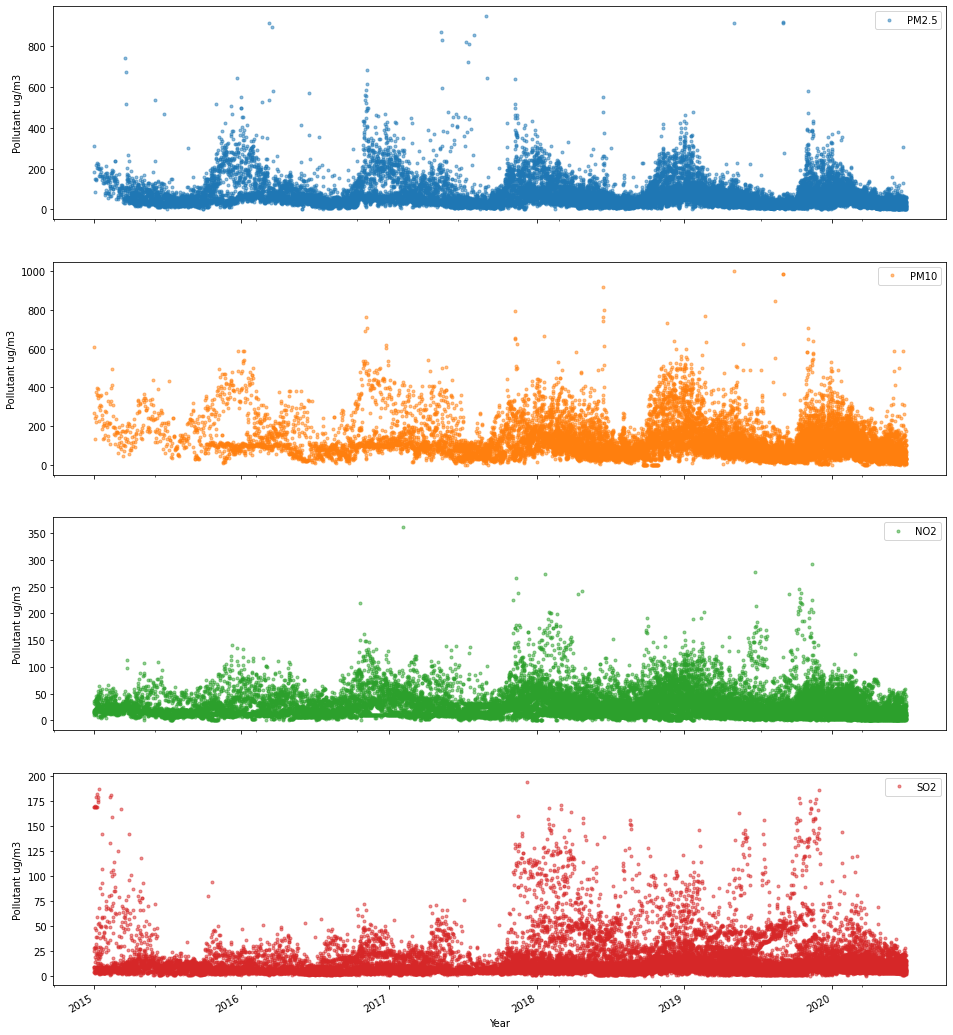

In [ ]:
axes = df[pollutantList].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    ax.set_xlabel('Year')
    ax.set_ylabel('Pollutant ug/m3')

In [ ]:
df2 = df.copy()

In [ ]:
df['Year'] = [d.year for d in df.index]
df['Month'] = [d.month for d in df.index]

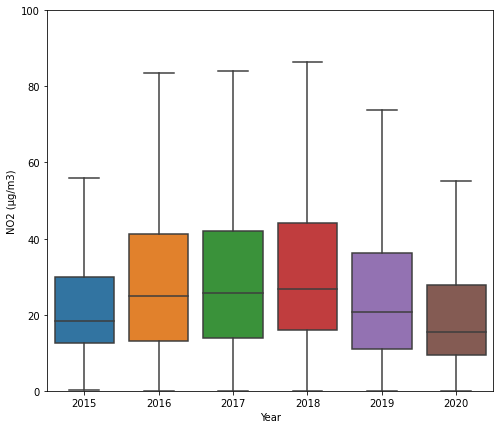

In [ ]:
f, ax = plt.subplots(figsize=(8, 7))
ax = sns.boxplot(x='Year', y="NO2", data = df, fliersize=0);
ax.set_ylim(0,100)
ax.set_ylabel("NO2 (μg/m3)");

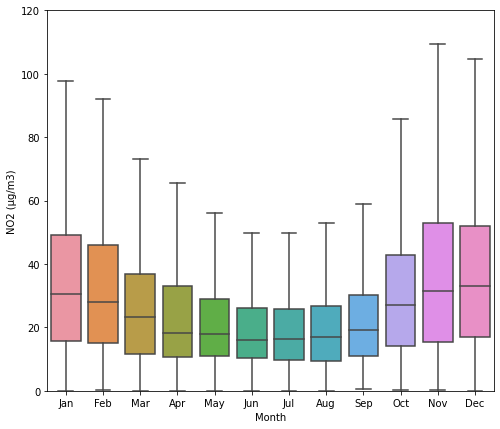

In [ ]:
f, ax = plt.subplots(figsize=(8, 7))
ax = sns.boxplot(x='Month', y="NO2", data = df, fliersize=0);
ax.set_ylim(0,120)
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]);
ax.set_ylabel("NO2 (μg/m3)");

(0.0, 40.0)

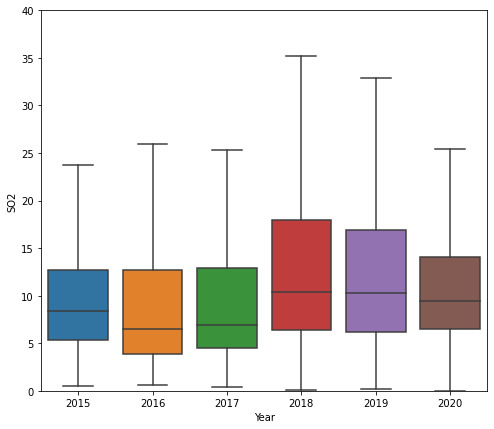

In [ ]:
f, ax = plt.subplots(figsize=(8, 7))
ax = sns.boxplot(x='Year', y="SO2", data = df, fliersize=0);
ax.set_ylim(0,40)

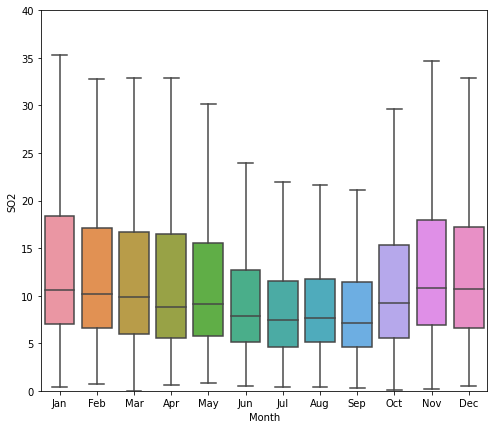

In [ ]:
f, ax = plt.subplots(figsize=(8, 7))
ax = sns.boxplot(x='Month', y="SO2", data = df, fliersize=0);
ax.set_ylim(0,40)
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]);

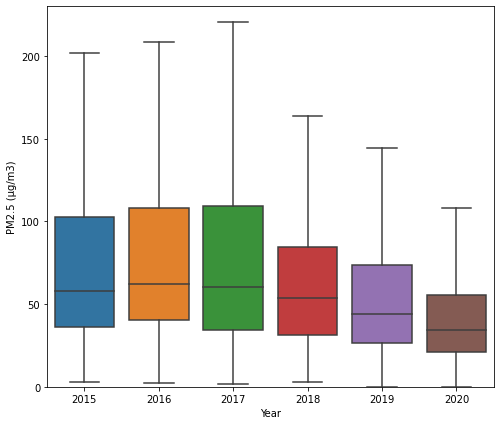

In [ ]:
f, ax = plt.subplots(figsize=(8, 7))
ax = sns.boxplot(x='Year', y="PM2.5", data = df, fliersize=0);
ax.set_ylim(0,230);
ax.set_ylabel("PM2.5 (μg/m3)");

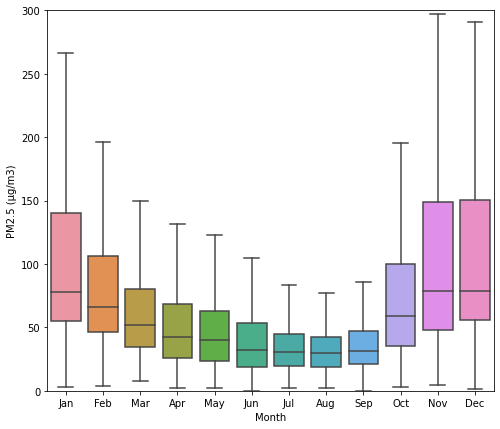

In [ ]:
f, ax = plt.subplots(figsize=(8, 7))
ax = sns.boxplot(x='Month', y="PM2.5", data = df, fliersize=0);
ax.set_ylim(0,300)
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]);
ax.set_ylabel("PM2.5 (μg/m3)");

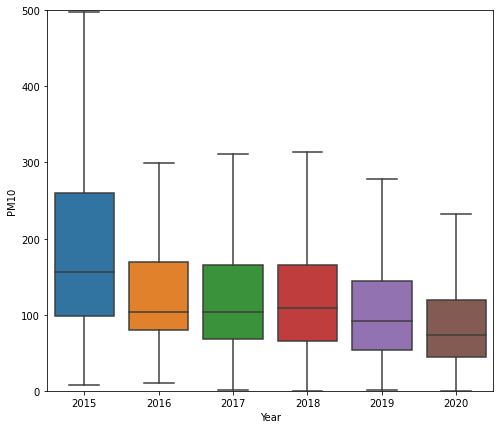

In [ ]:
f, ax = plt.subplots(figsize=(8, 7))
ax = sns.boxplot(x='Year', y="PM10", data = df, fliersize=0);
ax.set_ylim(0,500);

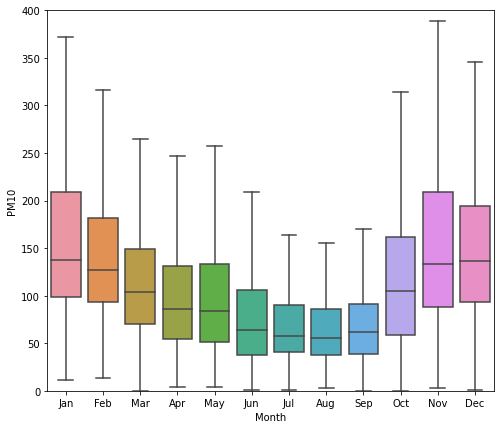

In [ ]:
f, ax = plt.subplots(figsize=(8, 7))
ax = sns.boxplot(x='Month', y="PM10", data = df, fliersize=0);
ax.set_ylim(0,400)
ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]);
ax.set_ylabel("PM10 (μg/m3)");

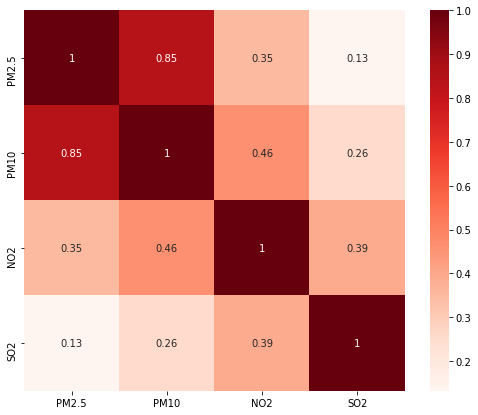

In [ ]:
corr = df[pollutantList].corr()
plt.subplots(figsize=(9,7))
ax = sns.heatmap(corr, vmax=1, cmap="Reds", square=True, annot=True);

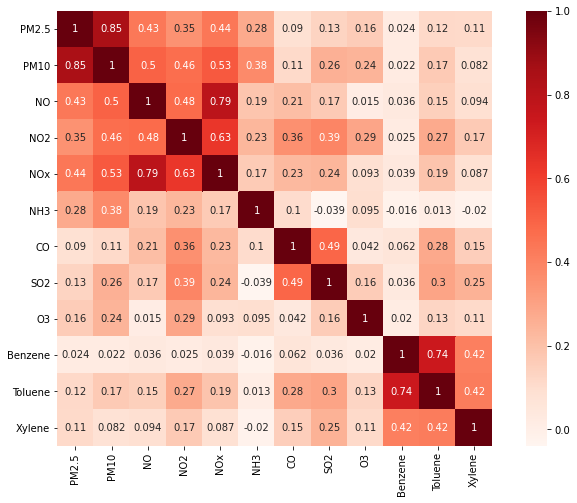

In [ ]:
corr = df[fullpollutantList].corr()
plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr, vmax=1, cmap="Reds", square=True, annot=True);

### Grouping by city

Which cities in India are the worse effected?

In [ ]:
def compareCity(pollutant):
  pollCity = df[['City',pollutant]].groupby(["City"]).mean()
  pollCitydf = pollCity.sort_values(by=pollutant, ascending=False)
  pollCity = pollCitydf.style.background_gradient(cmap='Reds')
  return pollCity, pollCitydf

tableCityPoll, dfCityPoll = compareCity("PM2.5")
dfCityPoll.reset_index(inplace=True)

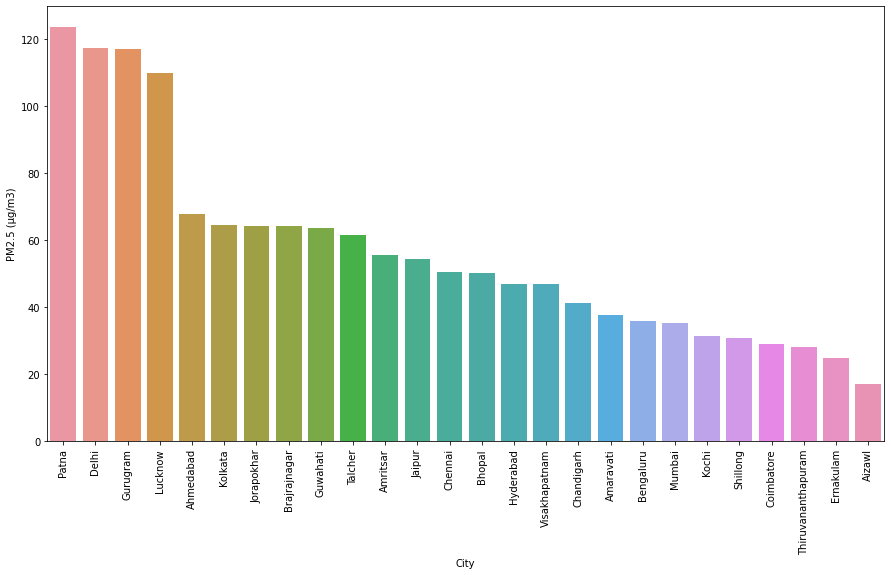

In [ ]:
f, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(data = dfCityPoll, x = "City", y = "PM2.5")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_ylabel("PM2.5 (μg/m3)");

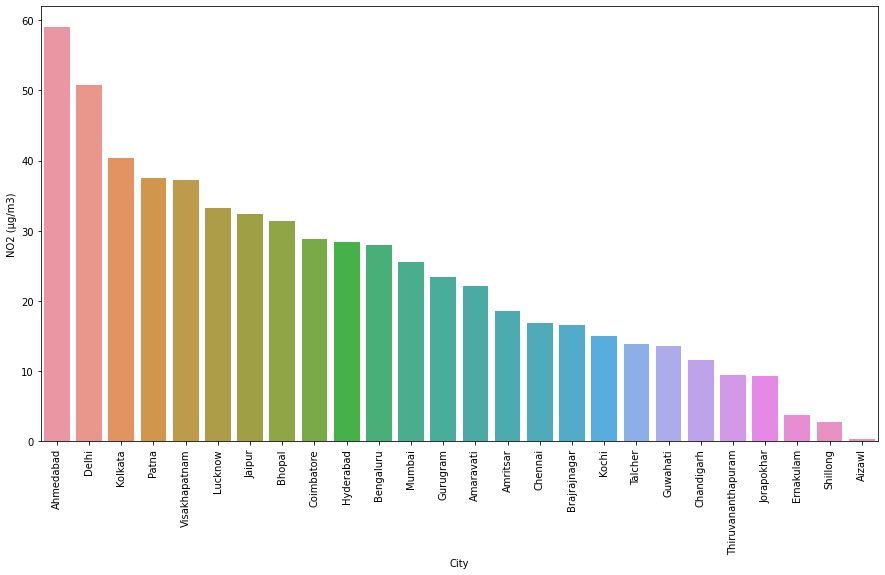

In [ ]:
tableCityPoll, dfCityPoll = compareCity("NO2")
dfCityPoll.reset_index(inplace=True)

f, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(data = dfCityPoll, x = "City", y = "NO2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_ylabel("NO2 (μg/m3)");

### Comparing times

In [ ]:
df.reset_index(inplace=True)

In [ ]:
def plotTimeFigures(city, pollutant):
  fig = px.line(df[(df['City'] == city)], x="Date", y=pollutant)
  fig.update_yaxes(title_text = pollutant + " (μg/m3)")
  fig.update_xaxes(title_text = "Date")
  fig.show()

  fig = px.line(df[(df['City'] == city) & (df['Date'] > "2019-01-01")], x="Date", y=pollutant)
  fig.update_yaxes(title_text = pollutant + " (μg/m3)")
  fig.update_xaxes(title_text = "Date")
  fig.show()

  lock_2020 = df[(df['City'] == city) & (df['Date'] > "2020-03-01") & (df['Date'] <= "2020-07-01")]
  lock_2019 = df[(df['City'] == city) & (df['Date'] > "2019-03-01") & (df['Date'] <= "2019-07-01")]
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=lock_2019['Date'], y=lock_2019[pollutant], mode='lines+markers', name="2019"))
  fig.add_trace(go.Scatter(x=lock_2019['Date'], y=lock_2020[pollutant], mode='lines+markers', name="2020"))
  fig.update_yaxes(title_text = pollutant + " (μg/m3)")
  fig.update_xaxes(title_text = "Date")
  fig.show()

plotTimeFigures("Delhi", "PM2.5")

In [ ]:
plotTimeFigures("Delhi", "NO2")

In [ ]:
LOCKDOWN_DATE_1 = "2020-03-25"

def plotTimeFiguresWithLockdown(city, pollutant):
  maxPollutantval = (df[(df['City'] == city) & (df['Date'] > "2019-01-01")])[pollutant].max()
  maxPollutantval2 = (df[(df['City'] == city) & (df['Date'] > "2019-03-01") & (df['Date'] <= "2019-07-01")])[pollutant].max()
  fig = px.line(df[(df['City'] == city)], x="Date", y=pollutant)
  fig.add_shape(type="line", x0=LOCKDOWN_DATE_1, y0=0, x1=LOCKDOWN_DATE_1, y1=maxPollutantval, line=dict(color="Green",width=2))
  fig.update_yaxes(title_text = pollutant + " (μg/m3)")
  fig.update_xaxes(title_text = "Date")
  fig.show()

  fig = px.line(df[(df['City'] == city) & (df['Date'] > "2019-01-01")], x="Date", y=pollutant)
  fig.add_shape(type="line", x0=LOCKDOWN_DATE_1, y0=0, x1=LOCKDOWN_DATE_1, y1=maxPollutantval, line=dict(color="Green",width=2))
  fig.update_yaxes(title_text = pollutant + " (μg/m3)")
  fig.update_xaxes(title_text = "Date")
  fig.show()

  lock_2020 = df[(df['City'] == city) & (df['Date'] > "2020-03-01") & (df['Date'] <= "2020-07-01")]
  lock_2019 = df[(df['City'] == city) & (df['Date'] > "2019-03-01") & (df['Date'] <= "2019-07-01")]
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=lock_2019['Date'], y=lock_2019[pollutant], mode='lines+markers', name="2019"))
  fig.add_trace(go.Scatter(x=lock_2019['Date'], y=lock_2020[pollutant], mode='lines+markers', name="2020"))
  fig.add_shape(type="line", x0="2019-03-25", y0=0, x1="2019-03-25", y1=maxPollutantval2, line=dict(color="Green",width=2))
  fig.update_yaxes(title_text = pollutant + " (μg/m3)")
  fig.update_xaxes(title_text = "Date")
  fig.show()

In [ ]:
plotTimeFiguresWithLockdown("Delhi", "PM2.5")

In [ ]:
plotTimeFiguresWithLockdown("Delhi", "NO2")

In [ ]:
def plotTimeFiguresWithLockdownAndTarget(city, pollutant):
  if pollutant == "NO2":
    target = 80
  elif pollutant == "SO2":
    target = 80
  elif pollutant == "PM2.5":
    target = 60
  elif pollutant == "PM10":
    target = 100

  maxPollutantval = (df[(df['City'] == city) & (df['Date'] > "2019-01-01")])[pollutant].max()
  maxPollutantval2 = (df[(df['City'] == city) & (df['Date'] > "2019-03-01") & (df['Date'] <= "2019-07-01")])[pollutant].max()

  fig = px.line(df[(df['City'] == city)], x="Date", y=pollutant)
  fig.add_shape(type="line", x0=LOCKDOWN_DATE_1, y0=0, x1=LOCKDOWN_DATE_1, y1=maxPollutantval, line=dict(color="Green",width=2))
  fig.add_shape(type="line", x0="2015-01-01", y0=target, x1="2020-07-01", y1=target, line=dict(color="Orange",width=2))
  fig.update_yaxes(title_text = pollutant + " (μg/m3)")
  fig.update_xaxes(title_text = "Date")
  fig.show()

  fig = px.line(df[(df['City'] == city) & (df['Date'] > "2019-01-01")], x="Date", y=pollutant)
  fig.add_shape(type="line", x0=LOCKDOWN_DATE_1, y0=0, x1=LOCKDOWN_DATE_1, y1=maxPollutantval, line=dict(color="Green",width=2))
  fig.add_shape(type="line", x0="2019-01-01", y0=target, x1="2020-07-01", y1=target, line=dict(color="Orange",width=2))
  fig.update_yaxes(title_text = pollutant + " (μg/m3)")
  fig.update_xaxes(title_text = "Date")
  fig.show()

  lock_2020 = df[(df['City'] == city) & (df['Date'] > "2020-03-01") & (df['Date'] <= "2020-07-01")]
  lock_2019 = df[(df['City'] == city) & (df['Date'] > "2019-03-01") & (df['Date'] <= "2019-07-01")]
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=lock_2019['Date'], y=lock_2019[pollutant], mode='lines+markers', name="2019"))
  fig.add_trace(go.Scatter(x=lock_2019['Date'], y=lock_2020[pollutant], mode='lines+markers', name="2020"))
  fig.add_shape(type="line", x0="2019-03-25", y0=0, x1="2019-03-25", y1=maxPollutantval2, line=dict(color="Green",width=2))
  fig.add_shape(type="line", x0="2019-03-01", y0=target, x1="2019-07-01", y1=target, line=dict(color="Orange",width=2))
  fig.update_yaxes(title_text = pollutant + " (μg/m3)")
  fig.update_xaxes(title_text = "Date")
  fig.show()

In [ ]:
plotTimeFiguresWithLockdownAndTarget("Delhi", "NO2")

In [ ]:
plotTimeFiguresWithLockdownAndTarget("Delhi", "PM2.5")